                                Insurance Claim Fraud Detection Project

In [299]:
import pandas as pd

In [300]:
import numpy as np

In [301]:
import matplotlib.pyplot as plt

In [302]:
import seaborn as sns

In [303]:
import warnings

In [304]:
warnings.filterwarnings('ignore')

In [305]:
df=pd.read_csv('insurance fraud.csv')

In [306]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [307]:
df.head()#top 5 rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [308]:
df.tail()#bottom 5 rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [309]:
df.sample()#randomly selected row

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
28,224,40,914088,08-02-1990,OH,100/300,2000,1291.7,0,609837,...,YES,69840,7760,15520,46560,Dodge,Neon,2009,N,NaN


In [310]:
df.keys()#columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [311]:
df.info()#information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [312]:
df.dtypes#data types

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [313]:
df.describe()#statiscal info.

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [314]:
df.isnull()#check null values

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [315]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<Axes: >

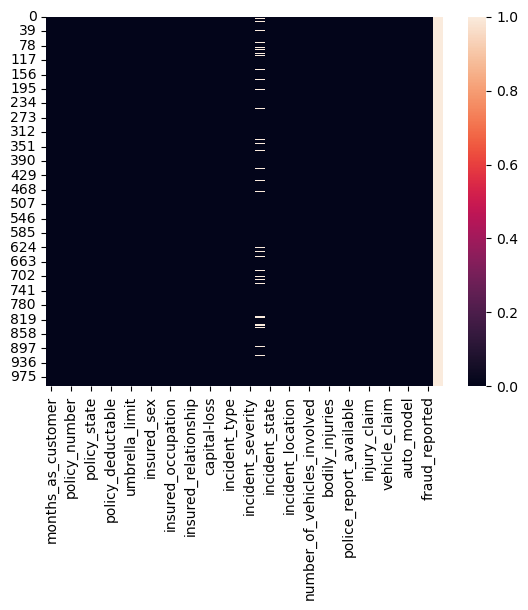

In [316]:
sns.heatmap(df.isnull())

In [317]:
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

In [318]:
# Drop the _c39 column
df.drop('_c39', axis=1, inplace=True)

<Axes: >

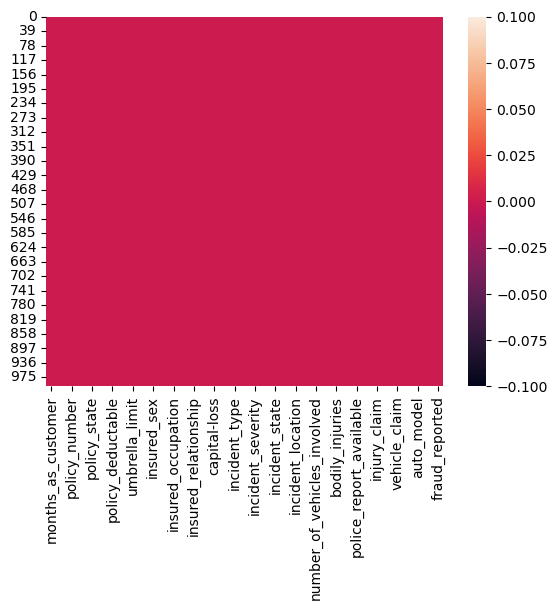

In [319]:
sns.heatmap(df.isnull())

In [320]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [321]:
df.shape#rows/columns

(1000, 39)

In [322]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [323]:
#Univariate Analysis:

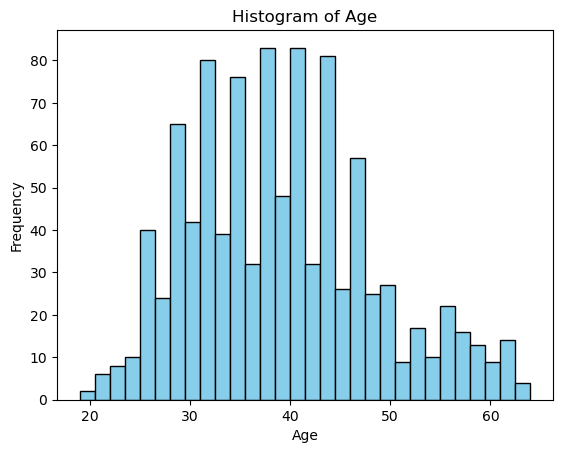

In [324]:
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

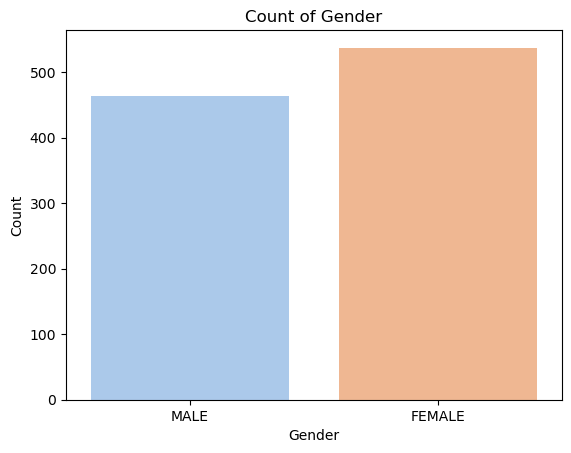

In [325]:
sns.countplot(x='insured_sex', data=df, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()

In [326]:
#Bivariate Analysis:

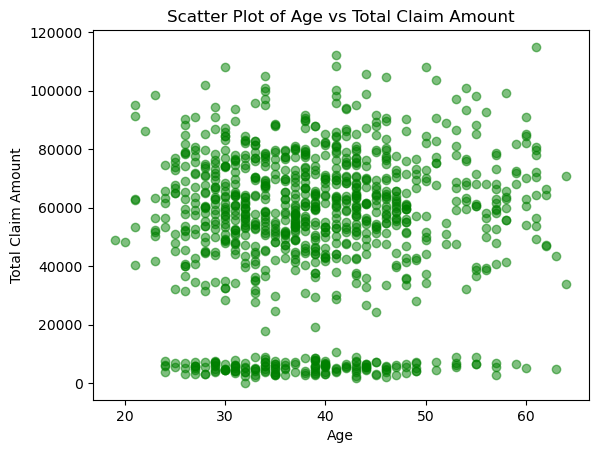

In [327]:
plt.scatter(df['age'], df['total_claim_amount'], alpha=0.5, color='green')
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.title('Scatter Plot of Age vs Total Claim Amount')
plt.show()

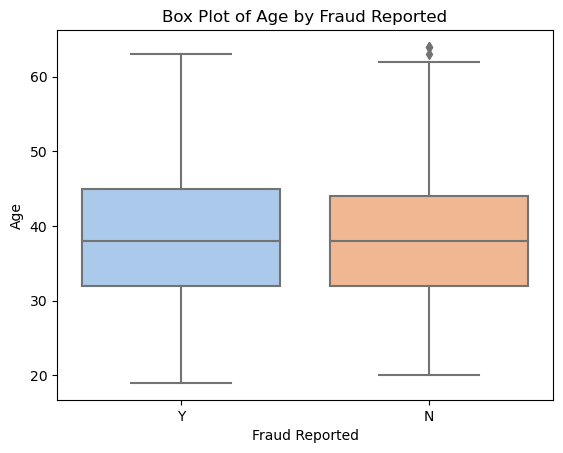

In [328]:
sns.boxplot(x='fraud_reported', y='age', data=df, palette='pastel')
plt.xlabel('Fraud Reported')
plt.ylabel('Age')
plt.title('Box Plot of Age by Fraud Reported')
plt.show()

In [329]:
#Multivariate Analysis:

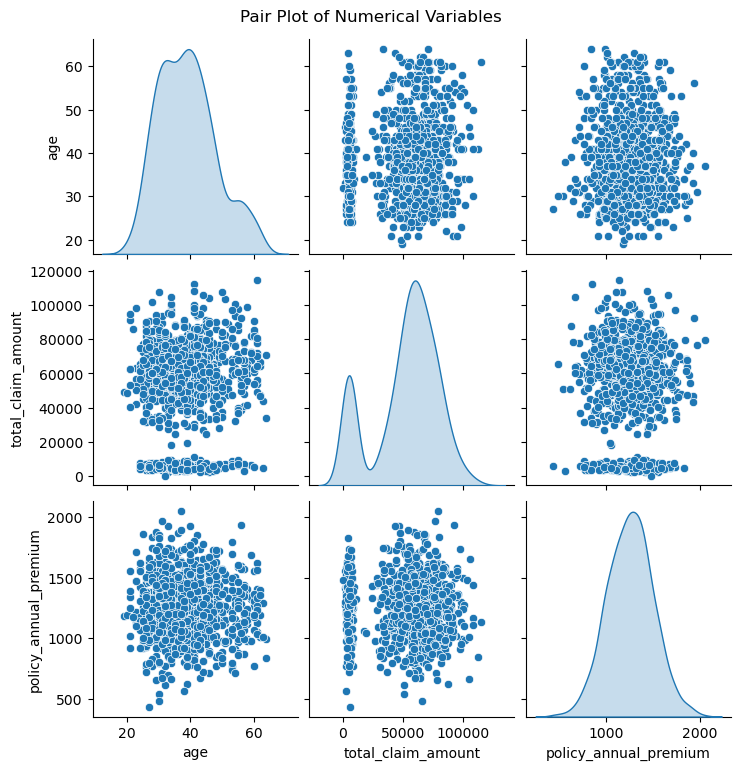

In [330]:
sns.pairplot(df[['age', 'total_claim_amount', 'policy_annual_premium']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

In [331]:
from sklearn.preprocessing import LabelEncoder
# Select categorical columns to one-hot encode
categorical_columns = ['policy_bind_date','policy_state','policy_csl','insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_date','incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location','property_damage','police_report_available','auto_make',
       'auto_model','fraud_reported']

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [332]:
# Select numerical columns to check for skewness
numerical_columns = ['months_as_customer', 'age','policy_number', 'policy_deductable', 'policy_annual_premium', 
                     'umbrella_limit','insured_zip','capital-gains', 
                     'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
                     'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim','auto_year']

# Calculate skewness
skewness = df[numerical_columns].apply(lambda x: x.skew())

# Filter columns with skewness above a threshold (e.g., 0.5)
skewed_columns = skewness[abs(skewness) > 0.5].index

# Apply log transformation to skewed columns
df[skewed_columns] = np.log1p(df[skewed_columns])

# Display the skewness after transformation
skewness_after = df[skewed_columns].apply(lambda x: x.skew())

In [333]:
# Calculate the IQR for each column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers
outliers = ((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR)))
# Replace outliers with the upper/lower bound (you can choose to remove them instead)
df[numerical_columns] = np.where(outliers, Q1 - threshold * IQR, df[numerical_columns])

# Display the first few rows of the DataFrame with handled outliers
print(df.head())

   months_as_customer   age  policy_number  policy_bind_date  policy_state  \
0               328.0  48.0       521585.0               532             2   
1               228.0  42.0       342868.0               821             1   
2               134.0  29.0       687698.0               186             2   
3               256.0  41.0       227811.0               766             0   
4               228.0  44.0       367455.0               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1             1000.0                1406.91             0.0   
1           1             2000.0                1197.22             0.0   
2           0             2000.0                1413.14             0.0   
3           1             2000.0                1415.74             0.0   
4           2             1000.0                1583.91             0.0   

   insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0

In [334]:
#unique values of all columns

In [335]:
r=[]
for columns in df:
    r=df[columns].nunique()
    print(r)

391
45
1000
951
3
3
3
983
1
995
2
7
14
20
6
338
354
60
4
4
4
4
7
7
1000
24
4
3
3
4
3
647
638
621
623
14
39
21
2


In [336]:
#all unique values

In [337]:
r=[]
for columns in df:
    r=df[columns].unique()
    print(r)

[328. 228. 134. 256. 137. 165.  27. 212. 235. 447.  60. 121. 180. 473.
  70. 140. 160. 196. 460. 217. 370. 413. 237.   8. 257. 202. 224. 241.
  64. 166. 155. 114. 149. 147.  62. 289. 431. 199.  79. 116.  37. 106.
 269. 265. 163. 355. 175. 192. 430.  91. 223. 195.  22. 439.  94.  11.
 151. 154. 245. 119. 215. 295. 254. 107. 478. 128. 338. 271. 222. 120.
 270. 319. 194. 227. 244.  78. 200. 284. 275. 153.  31.  41. 127.  61.
 207. 219.  80. 325.  29. 239. 279. 350. 464. 118. 298.  87. 261. 453.
 210. 168. 390. 258. 225. 164. 255. 206. 203. 211. 274.  81. 280. 112.
  24.  93. 171. 124. 287. 122. 398. 214. 209.  82. 193. 288. 104. 101.
 375. 461. 428.  45. 136. 216. 278. 108.  14. 276.  47.  73. 294. 324.
  53. 426. 111.  86. 296. 125. 177. 238. 449. 252. 359.  19. 285.  30.
 342. 468. 343. 404.  63. 335. 142. 272.  69.  38. 281. 246. 330. 362.
 371. 377. 172.  99. 249. 190. 174.  95.   2. 117. 242. 440.  20. 208.
 156. 232.  84. 394.  35. 369. 332. 243. 264.  32. 259. 186. 201. 436.
 189. 

In [338]:
X = df.drop('fraud_reported', axis=1)  # X contains all independent variables
y = df['fraud_reported']  # y contains the target variable

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [340]:
correlation_matrix = df.corr()

In [341]:
correlation_matrix 

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.871168,0.057555,0.055055,-0.000328,-0.026819,0.026807,0.009988,NaN,0.018498,...,0.058383,0.017647,0.057085,0.065329,0.067444,0.057340,0.047655,0.004202,-0.000292,0.020544
age,0.871168,1.000000,0.049820,0.041429,-0.007840,-0.016501,0.047331,0.031414,NaN,0.013322,...,0.032684,0.020501,0.077135,0.086263,0.096117,0.069976,0.032061,0.001342,0.000123,0.012117
policy_number,0.057555,0.049820,1.000000,0.045713,0.072815,0.038917,-0.006738,0.035456,NaN,0.007427,...,-0.012661,0.032019,-0.016272,-0.008762,0.001826,-0.017746,0.023860,0.065240,-0.000183,-0.029443
policy_bind_date,0.055055,0.041429,0.045713,1.000000,0.015289,0.008486,-0.001721,-0.036496,NaN,-0.043221,...,-0.007004,-0.034920,0.016258,0.024160,0.010332,0.013650,-0.025955,0.000306,0.035067,0.060642
policy_state,-0.000328,-0.007840,0.072815,0.015289,1.000000,0.001027,0.010033,0.032887,NaN,0.009510,...,0.022960,0.071950,-0.003154,-0.046290,0.015054,0.002074,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.016501,0.038917,0.008486,0.001027,1.000000,0.003384,0.022998,NaN,0.006773,...,0.071500,0.002424,-0.057083,-0.078818,-0.059063,-0.047866,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.047331,-0.006738,-0.001721,0.010033,0.003384,1.000000,0.015871,NaN,0.003487,...,0.066639,0.030166,0.022190,0.039107,0.068487,0.009107,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.009988,0.031414,0.035456,-0.036496,0.032887,0.022998,0.015871,1.000000,NaN,0.030037,...,-0.004935,0.019967,-0.000805,-0.025781,-0.001272,0.006005,0.012543,-0.039867,-0.021447,-0.023794
umbrella_limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_zip,0.018498,0.013322,0.007427,-0.043221,0.009510,0.006773,0.003487,0.030037,NaN,1.000000,...,0.020664,-0.018956,-0.034207,-0.017428,-0.037929,-0.037347,-0.021479,0.023524,-0.032903,0.022039


In [342]:
missing_values = X.isna().sum()
infinite_values = X.isin([np.nan, np.inf, -np.inf]).sum()

# Step 2: Handle Missing Values (Example: using mean imputation)
X_filled = X.fillna(X.mean())

# Step 3: Handle Infinite Values (Example: replacing with NaN)
X_cleaned = X_filled.replace([np.inf, -np.inf], np.nan)

# Step 4: Re-calculate VIF
vif_data = calculate_vif(X_cleaned)

# Print the VIF values
print(vif_data)

                        feature           VIF
0            months_as_customer     17.929489
1                           age     82.216632
2                 policy_number      5.705195
3              policy_bind_date      4.080753
4                  policy_state      2.583845
5                    policy_csl      2.476396
6             policy_deductable      4.626049
7         policy_annual_premium     28.902999
8                umbrella_limit           NaN
9                   insured_zip   8775.443879
10                  insured_sex      1.915617
11      insured_education_level      3.457926
12           insured_occupation      3.821140
13              insured_hobbies      4.173458
14         insured_relationship      3.209808
15                capital-gains      1.873741
16                 capital-loss      1.994260
17                incident_date      4.048323
18                incident_type     12.357240
19               collision_type      6.291025
20            incident_severity   

In [343]:
from sklearn.decomposition import PCA

# Assuming X_imputed contains your independent variables
pca = PCA(n_components=10)  # You can experiment with different values of n_components
X_pca = pca.fit_transform(X_imputed)

In [344]:
# Creating a new feature 'age_squared'
df['age_squared'] = df['age'] ** 2

# Creating a binary feature 'is_old' based on age
df['is_old'] = (df['age'] > 65).astype(int)

# Extracting the month from 'incident_date'
df['incident_month'] = pd.to_datetime(df['incident_date']).dt.month

# Creating a feature based on the interaction between 'capital-gains' and 'capital-loss'
df['capital_interaction'] = df['capital-gains'] * df['capital-loss']

# Creating a feature based on the ratio of 'injury_claim' to 'total_claim_amount'
df['injury_claim_ratio'] = df['injury_claim'] / df['total_claim_amount']


In [345]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [346]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [347]:
missing_values = df.isnull().sum()

# Print the columns with missing values
print(missing_values[missing_values > 0])

umbrella_limit    1
dtype: int64


In [348]:
missing_values_after_imputation = pd.DataFrame(X_imputed).isnull().sum()

# Print the columns with missing values (if any)
print(missing_values_after_imputation[missing_values_after_imputation > 0])

Series([], dtype: int64)


In [349]:
X_train_imputed = imputer.transform(X_train)

In [351]:
from sklearn.model_selection import cross_val_score

In [352]:
# Define models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC())
]

# Iterate through models
for name, model in models:
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_imputed, y_train, cv=5)
    
    # Print results
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean()}")
    print("\n")

Model: Logistic Regression
Cross-Validation Accuracy Scores: [0.7625  0.7625  0.7625  0.75625 0.75625]
Mean Accuracy: 0.76


Model: Decision Tree
Cross-Validation Accuracy Scores: [0.78125 0.7625  0.775   0.8375  0.84375]
Mean Accuracy: 0.8


Model: Random Forest
Cross-Validation Accuracy Scores: [0.7625  0.76875 0.7375  0.80625 0.7875 ]
Mean Accuracy: 0.7725


Model: Support Vector Machine
Cross-Validation Accuracy Scores: [0.7625  0.7625  0.7625  0.75625 0.75625]
Mean Accuracy: 0.76




In [353]:
#Based on the cross-validation results, the Decision Tree model seems to have the highest mean accuracy

In [356]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Train the model on the imputed training data (X_train_imputed and y_train)
decision_tree_model.fit(X_train_imputed, y_train)

DecisionTreeClassifier()

In [358]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')


Accuracy: 0.7700
Precision: 0.5882
Recall: 0.5455
F1-Score: 0.5660
ROC-AUC Score: 0.7003


In [360]:
from sklearn.impute import SimpleImputer

# Assuming X contains your independent variables
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as well
X_imputed = imputer.fit_transform(X)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20]
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='precision', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best estimator (model)
best_rf_model = grid_search.best_estimator_

In [ ]:
# Assuming best_rf_model is trained Random Forest model
feature_importances = best_rf_model.feature_importances_

# Assuming X_train contains feature data
feature_names = X_train.columns

# Create a DataFrame to display the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(10))  # Displaying the top 10 features

In [ ]:
final_model = decision_tree_model

In [ ]:
import joblib

joblib.dump(final_model, 'final_model.joblib')

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('final_model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Assuming JSON data
    features = data['features']  # Assuming 'features' is the key for input data

    # Make predictions
    predictions = model.predict(features)

    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
     app.run(debug=True)

In [ ]:
test_data = pd.read_csv('test_data.csv')  # Assuming you have a CSV file with test data

# Assuming 'X_test' contains the features and 'y_test' contains the true labels
X_test = test_data.drop(columns=['target_column'])
y_test = test_data['target_column']

# Make predictions using the final model
predictions = final_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Log the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')